# Credit Card Risk Assessment

In [313]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [314]:
applicant_df=pd.read_csv('applicant.csv')
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [315]:
print(applicant_df.shape)

(1000, 15)


In [316]:
loan_df=pd.read_csv('loan.csv')
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [317]:
print(loan_df.shape)

(1000, 13)


# Merging applicant and loan dataframes:

In [318]:
df= pd.concat([applicant_df,loan_df], axis = 1)
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


# Data Cleaning

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [320]:
df.duplicated().sum()

0

In [321]:
df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

C:\Users\JSE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='high_risk_applicant', ylabel='Density'>

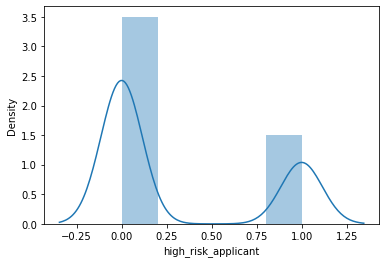

In [322]:
sns.distplot(df['high_risk_applicant'])

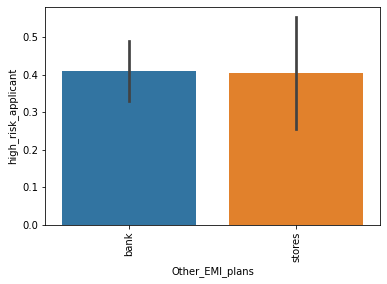

In [323]:
sns.barplot(x=df['Other_EMI_plans'],y=df['high_risk_applicant'])
plt.xticks(rotation='vertical')
plt.show()

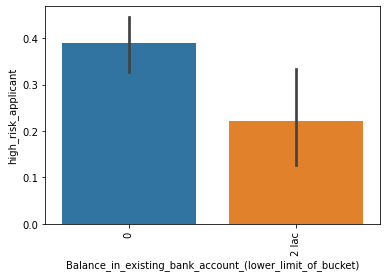

In [324]:
sns.barplot(x=df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'],y=df['high_risk_applicant'])
plt.xticks(rotation='vertical')
plt.show()

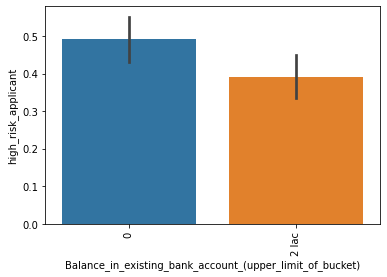

In [325]:
sns.barplot(x=df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'],y=df['high_risk_applicant'])
plt.xticks(rotation='vertical')
plt.show()

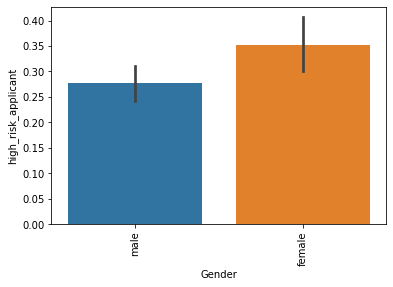

In [326]:
sns.barplot(x=df['Gender'],y=df['high_risk_applicant'])
plt.xticks(rotation='vertical')
plt.show()

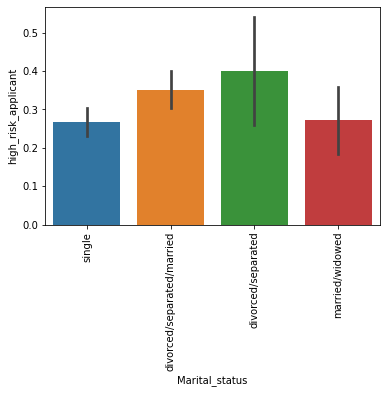

In [327]:
sns.barplot(x=df['Marital_status'],y=df['high_risk_applicant'])
plt.xticks(rotation='vertical')
plt.show()

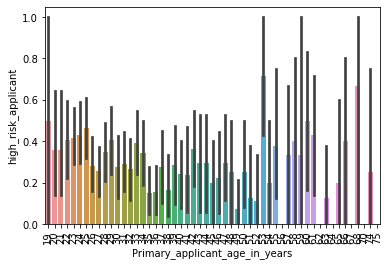

In [328]:
sns.barplot(x=df['Primary_applicant_age_in_years'],y=df['high_risk_applicant'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Primary_applicant_age_in_years', ylabel='high_risk_applicant'>

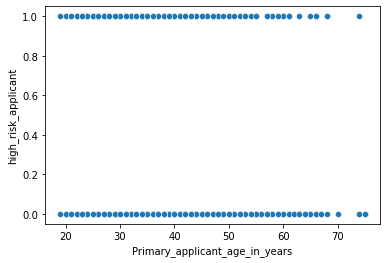

In [329]:
sns.scatterplot(x=df['Primary_applicant_age_in_years'],y=df['high_risk_applicant'])

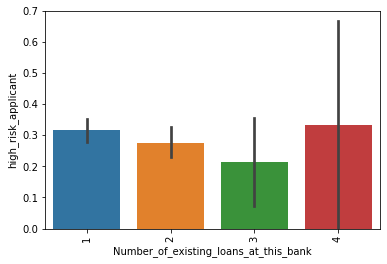

In [330]:

sns.barplot(x=df['Number_of_existing_loans_at_this_bank'],y=df['high_risk_applicant'])
plt.xticks(rotation='vertical')
plt.show()

In [331]:
df.drop(columns=['applicant_id','Telephone','Other_EMI_plans','loan_application_id',],inplace=True)

In [332]:
df.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1


In [333]:
df.fillna(df.mean())

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
997,38,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,45,electronic equipment,1845000,4,NaN,0,0,1,existing loans paid back duly till now,1


In [334]:
df= df.fillna("Unknown")
df

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,Unknown,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,Unknown,0,0,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
997,38,male,single,1,own,4,skilled employee / official,7 years,Unknown,1,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,45,electronic equipment,1845000,4,Unknown,0,0,1,existing loans paid back duly till now,1


In [336]:
X = df.drop(columns=['high_risk_applicant'])
y = df['high_risk_applicant']


In [337]:
X

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,67,male,single,1,own,4,skilled employee / official,7 years,Unknown,1,...,0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,2 lac,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,Unknown,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,0,24,new vehicle,4870000,3,Unknown,0,0,2,delay in paying off loans in the past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,Unknown,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,0,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now
997,38,male,single,1,own,4,skilled employee / official,7 years,Unknown,1,...,Unknown,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,0,45,electronic equipment,1845000,4,Unknown,0,0,1,existing loans paid back duly till now


In [338]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: high_risk_applicant, Length: 1000, dtype: int64

In [339]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [340]:
X_train

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
614,22,female,divorced/separated/married,1,own,1,skilled employee / official,4 years,7 years,1,...,Unknown,18,FF&E,1808000,4,real estate,0,0,1,delay in paying off loans in the past
929,43,male,single,2,own,2,unskilled - resident,1 year,4 years,1,...,0,12,new vehicle,1344000,4,real estate,0,0,2,delay in paying off loans in the past
397,46,male,married/widowed,1,own,2,skilled employee / official,1 year,4 years,1,...,0,36,FF&E,2348000,3,building society savings agreement/life insurance,0,0,2,critical/pending loans at other banks
445,41,female,divorced/separated/married,1,rent,4,unskilled - resident,7 years,Unknown,1,...,Unknown,9,education,1244000,4,building society savings agreement/life insurance,0,0,2,critical/pending loans at other banks
414,35,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,0,24,new vehicle,1381000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,25,male,single,1,own,2,skilled employee / official,0 year,1 year,1,...,Unknown,24,electronic equipment,3105000,4,car or other,0,0,2,existing loans paid back duly till now
584,52,female,divorced/separated/married,1,for free,4,management / self-employed / highly qualified ...,7 years,Unknown,1,...,Unknown,12,new vehicle,2133000,4,Unknown,0,0,1,existing loans paid back duly till now
493,38,male,single,1,own,4,skilled employee / official,7 years,Unknown,1,...,2 lac,6,electronic equipment,368000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now
527,42,male,single,2,own,1,unskilled - resident,4 years,7 years,1,...,Unknown,4,electronic equipment,1503000,2,real estate,0,0,2,critical/pending loans at other banks


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Primary_applicant_age_in_years                            1000 non-null   int64 
 1   Gender                                                    1000 non-null   object
 2   Marital_status                                            1000 non-null   object
 3   Number_of_dependents                                      1000 non-null   int64 
 4   Housing                                                   1000 non-null   object
 5   Years_at_current_residence                                1000 non-null   int64 
 6   Employment_status                                         1000 non-null   object
 7   Has_been_employed_for_at_least                            1000 non-null   object
 8   Has_been_employed_for_at_most

In [342]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer


In [343]:
ohe=OneHotEncoder()
ohe.fit(X[['Gender','Marital_status','Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Purpose','Property','Loan_history']])

OneHotEncoder()

In [299]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Gender','Marital_status','Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Purpose','Property','Loan_history']),
                                    remainder='passthrough')

In [300]:
lr=LinearRegression()

In [301]:
pipe=make_pipeline(column_trans,lr)

In [302]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['divorced/separated', 'divorced/separated/married',
       'married/widowed', 'single'], dtype=object),
                                                                            array(['for free', 'own', 'rent'], dtype=object),
                                                                            array(['management / self-employed...
       'no loans taken/all loans paid back duly'], dtype=object)]),
                                                  ['Gender', 'Marital_status',
                                                   'Housing',
                                                   'Employment_status',
          

In [303]:
y_pred=pipe.predict(X_test)

In [304]:
r2_score(y_test,y_pred)

0.10966867266830704

In [348]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [349]:
np.argmax(scores)


130

In [350]:
scores[np.argmax(scores)]

0.3915654228758467

In [351]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.3915654228758467

In [305]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [306]:
import xgboost

In [307]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [346]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))